In [34]:
!pip install -r requirements.txt

when i put os module in my requirement file then it will give error
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os

The reason of this error is-
os is a built-in module in Python and does not need to be installed separately.

In [35]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [36]:
# Download latest version
path = kagglehub.dataset_download("desalegngeb/students-exam-scores")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\ravinder.pooni\.cache\kagglehub\datasets\desalegngeb\students-exam-scores\versions\2


In [37]:
files=os.listdir(path)
files

['Expanded_data_with_more_features.csv', 'Original_data_with_more_rows.csv']

In [38]:
df=pd.read_csv(f'{path}\\Expanded_data_with_more_features.csv')
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [39]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [41]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [42]:
df.LunchType.unique()

array(['standard', 'free/reduced'], dtype=object)

In [43]:
df.EthnicGroup.unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

Delete Unnamed: 0 column from dataframe

In [44]:
df =df.drop('Unnamed: 0',axis=1)
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


Gender Distribution

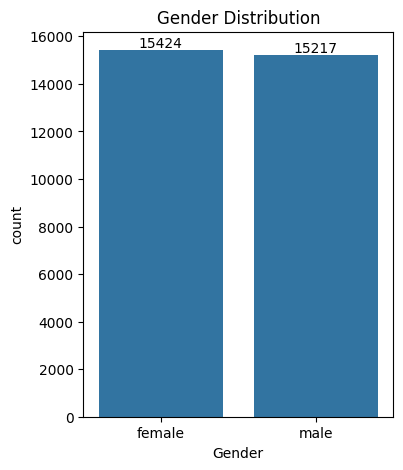

In [97]:
plt.figure(figsize=(4,5))
ax=sns.countplot(data=df,x='Gender')
ax.bar_label(ax.containers[0])
plt.title('Gender Distribution')
plt.show()

From the above chart we have analysed that the number of females is more than the number of males

Need mean data based on parent education

In [59]:
gb=df.groupby('ParentEduc').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
gb

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


If need for single column

In [64]:
gb1=df.groupby('ParentEduc')['WritingScore'].mean().round(2)
gb1

ParentEduc
associate's degree    70.30
bachelor's degree     73.33
high school           65.42
master's degree       76.36
some college          68.50
some high school      63.63
Name: WritingScore, dtype: float64

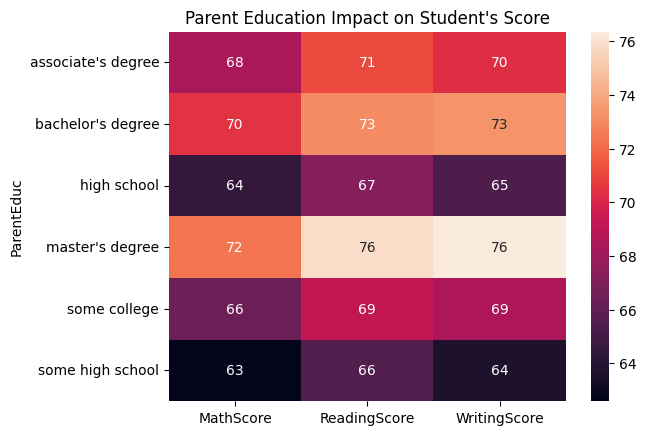

In [72]:
sns.heatmap(data=gb,annot=True)
plt.title("Parent Education Impact on Student's Score")
plt.show()

From the above chart we have concluded that the education of the parents have a good impact on their scores.

In [68]:
ms=df.groupby('ParentMaritalStatus').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'}).round(2)
ms

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.69,69.66,68.80
married,66.66,69.39,68.42
single,66.17,69.16,68.17
widowed,67.37,69.65,68.56


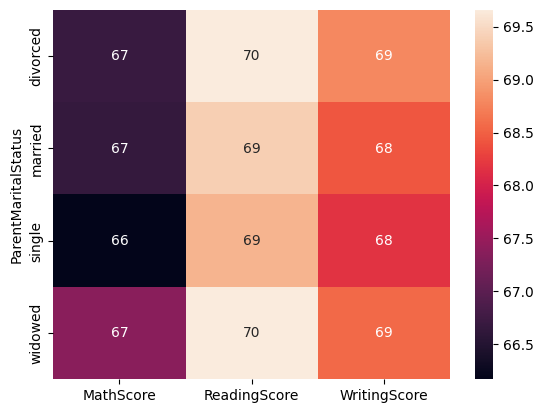

In [69]:
sns.heatmap(data=ms,annot=True)
plt.title("Parent Marital Impact on Student's Score")
plt.show()

From the above chart we have concluded that the marital status of the parents have a negligible impact on their scores.

Box plot mainly used to check, their is any outlier is present on our data or not.

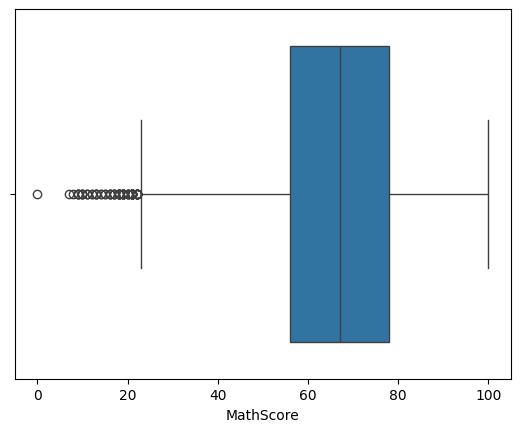

In [75]:
sns.boxplot(data=df,x='MathScore')
plt.show()

Distribution of Ethni Groups

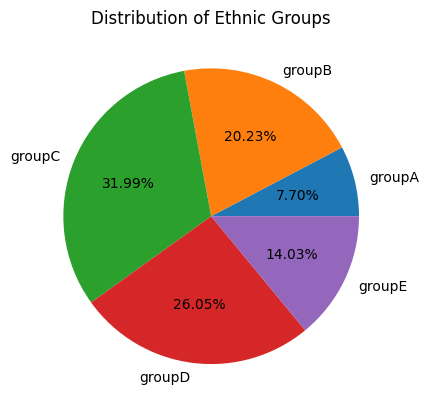

In [95]:
groupA=df.loc[(df['EthnicGroup']=='group A'),'EthnicGroup'].count()      
groupB=df.loc[(df['EthnicGroup']=='group B'),'EthnicGroup'].count()      
groupC=df.loc[(df['EthnicGroup']=='group C'),'EthnicGroup'].count()      
groupD=df.loc[(df['EthnicGroup']=='group D'),'EthnicGroup'].count()      
groupE=df.loc[(df['EthnicGroup']=='group E'),'EthnicGroup'].count()      

l=['groupA','groupB','groupC','groupD','groupE']
mlist=[groupA,groupB,groupC,groupD,groupE]
plt.pie(mlist,labels=l,autopct="%1.2f%%")
plt.title('Distribution of Ethnic Groups')
plt.show()